In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load the dataset
df = pd.read_csv('/content/50_Startups.csv')

In [3]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# Step 3: Perform EDA
# Check for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
correlation_matrix = df.drop('Profit', axis=1).corr()
print(correlation_matrix)

                 R&D Spend  Administration  Marketing Spend
R&D Spend         1.000000        0.241955         0.724248
Administration    0.241955        1.000000        -0.032154
Marketing Spend   0.724248       -0.032154         1.000000


<ipython-input-6-59d09297340a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop('Profit', axis=1).corr()


by looking the output, we can see that there is a strong positive correlation (0.72) between R&D Spend and Marketing Spend, meaning that as R&D Spend increases, Marketing Spend tends to increase as well

<Axes: >

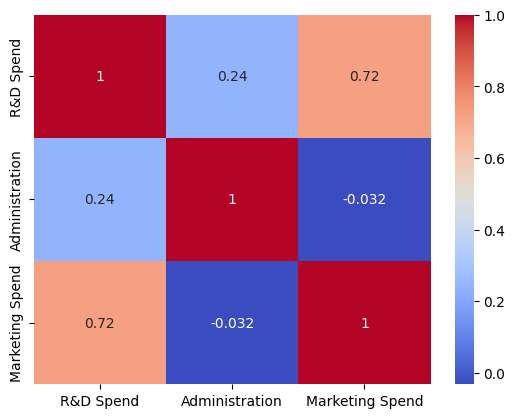

In [7]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [8]:
# Check for outliers
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#Visualisation 

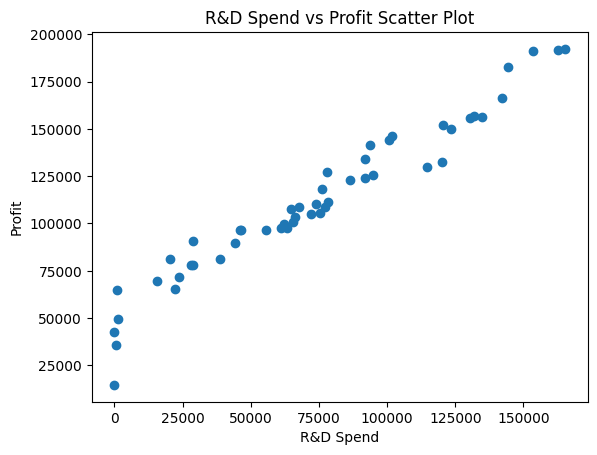

In [9]:
plt.scatter(df["R&D Spend"], df["Profit"])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend vs Profit Scatter Plot")
plt.show()

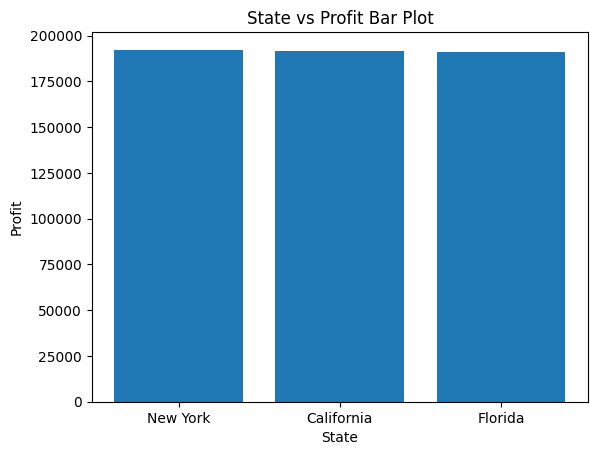

In [10]:

plt.bar(df["State"], df["Profit"])
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("State vs Profit Bar Plot")
plt.show()

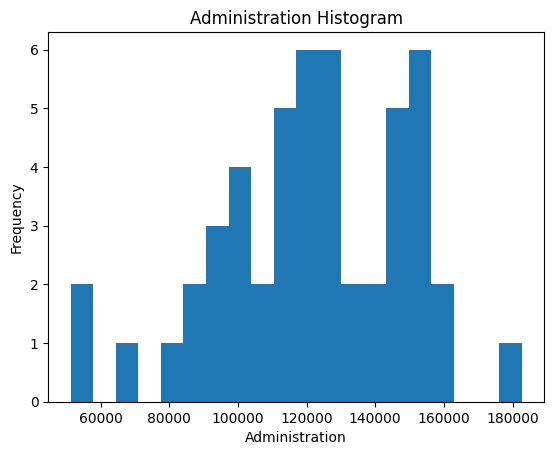

In [11]:
plt.hist(df["Administration"], bins=20)
plt.xlabel("Administration")
plt.ylabel("Frequency")
plt.title("Administration Histogram")
plt.show()

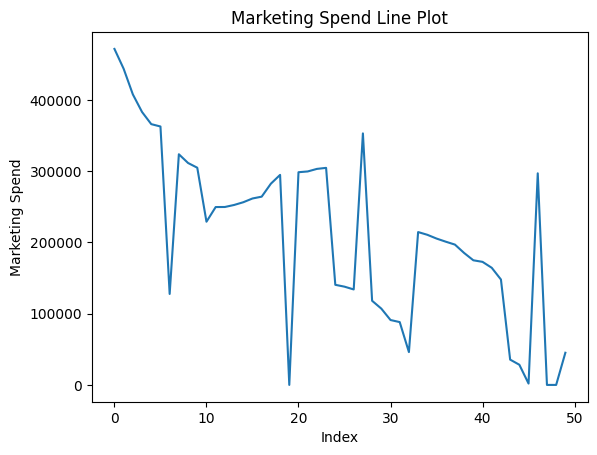

In [12]:
plt.plot(df["Marketing Spend"])
plt.xlabel("Index")
plt.ylabel("Marketing Spend")
plt.title("Marketing Spend Line Plot")
plt.show()

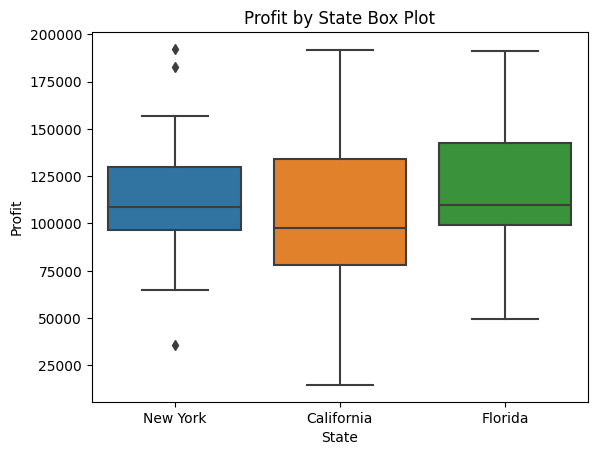

In [13]:
sns.boxplot(x="State", y="Profit", data=df)
plt.xlabel("State")
plt.ylabel("Profit")
plt.title("Profit by State Box Plot")
plt.show()

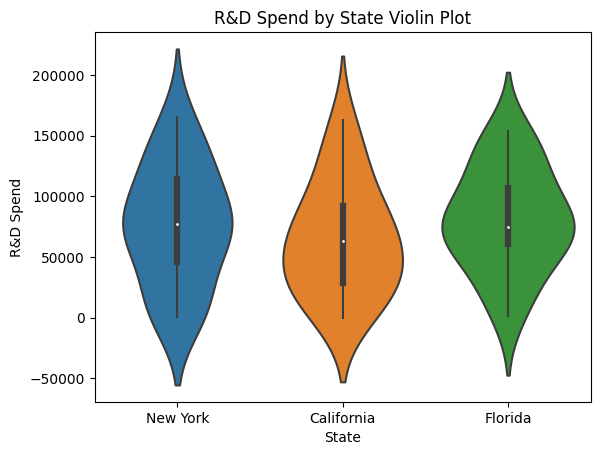

In [14]:
sns.violinplot(x="State", y="R&D Spend", data=df)
plt.xlabel("State")
plt.ylabel("R&D Spend")
plt.title("R&D Spend by State Violin Plot")
plt.show()

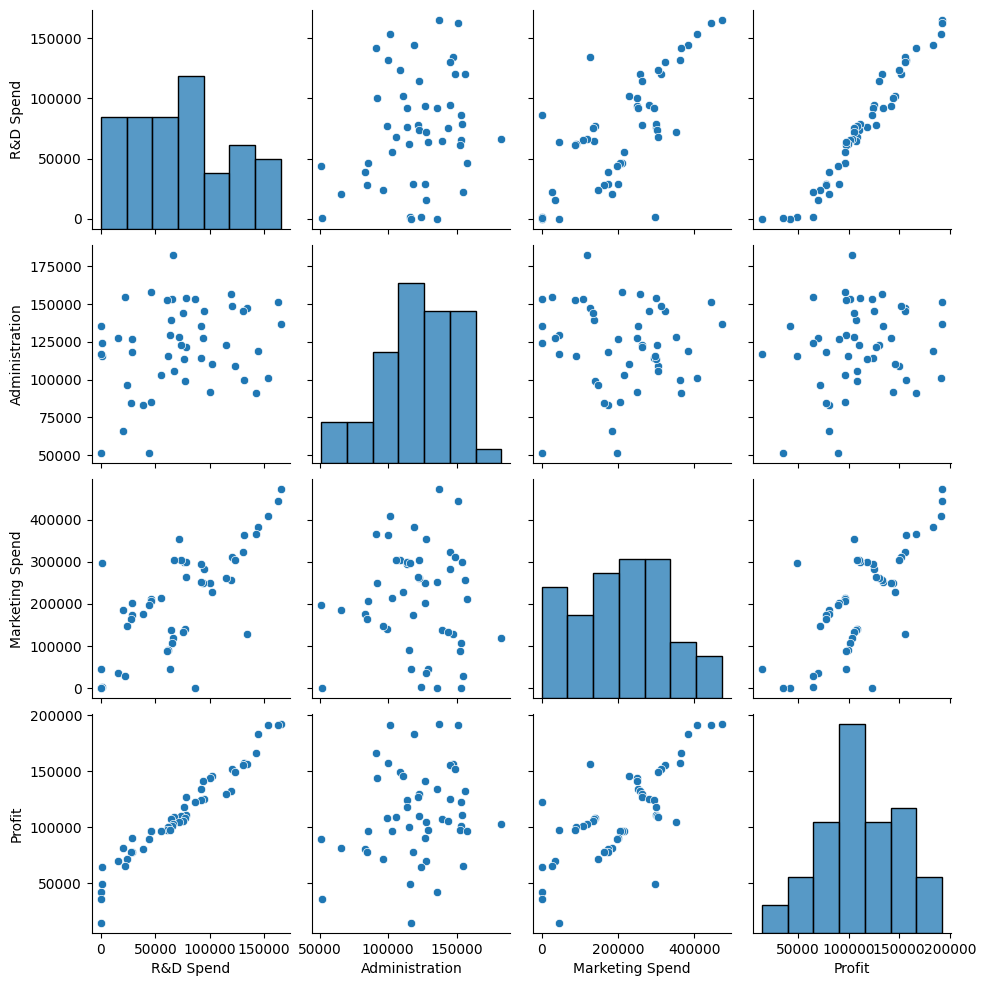

In [15]:
sns.pairplot(df)
plt.show()

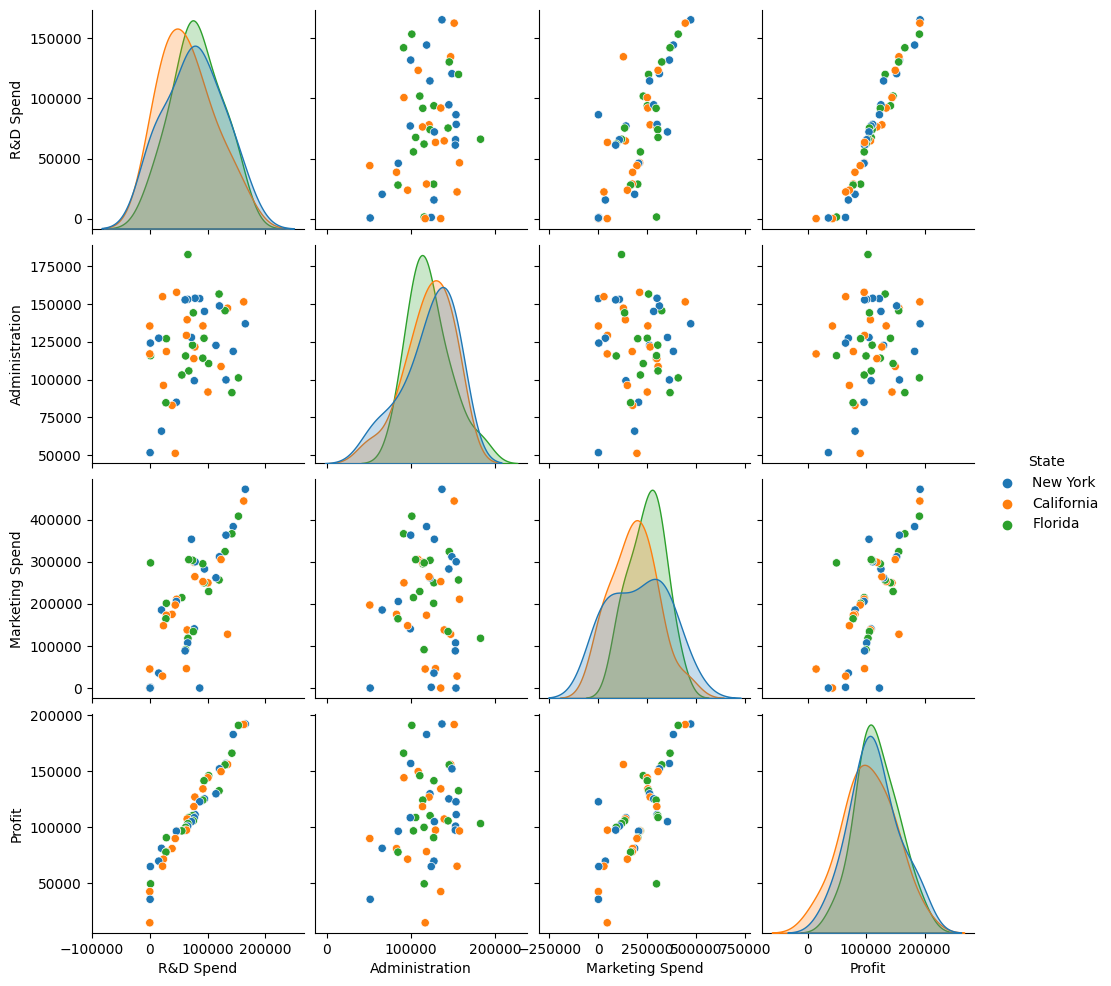

In [16]:
sns.pairplot(df, hue="State")
plt.show()

Encode categorical variables using one-hot encoding

In [17]:
df = pd.get_dummies(df, columns=['State'],drop_first=True)

In [18]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.2,136897.80,471784.10,192261.83,0,1
1,162597.7,151377.59,443898.53,191792.06,0,0


#Deciding dependent and indepndent variable

In [19]:
X = df.drop('Profit', axis=1)
y = df['Profit']

#Split the data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Ridge and linear regression models to the training data and comparing them

In [21]:
#Ridge model
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train, y_train)
y_pred_ridge=ridge_model.predict(X_test)

In [22]:
#linear regression model
from sklearn.linear_model import LinearRegression
L=LinearRegression()
L.fit(X_train, y_train)
y_pred_linear=L.predict(X_test)

In [23]:
# Fit the linear regression model using OLS
import statsmodels.api as sm
model_ols = sm.OLS(y_train, X_train).fit()
y_pred_ols=model_ols.predict(X_test)

In [24]:
#evluation of all three models
from sklearn.metrics import r2_score,mean_squared_error

R2_score_ridge=r2_score(y_test,y_pred_ridge)
RMSE_ridge=np.sqrt(mean_squared_error(y_test,y_pred_ridge))


R2_score_linear=r2_score(y_test,y_pred_linear)
RMSE_linear=np.sqrt(mean_squared_error(y_test,y_pred_linear))

R2_score_ols=r2_score(y_test,y_pred_ols)
RMSE_ols=np.sqrt(mean_squared_error(y_test,y_pred_ols))

print('R2_score_ridge',R2_score_ridge)
print('RMSE_ridge',RMSE_ridge)


print('R2_score_linear',R2_score_linear)
print('RMSE_linear',RMSE_linear)

print('R2_score_ols',R2_score_ols)
print('RMSE_ols',RMSE_ols)

R2_score_ridge 0.8994328030090689
RMSE_ridge 9024.32928239772
R2_score_linear 0.8987266414328637
RMSE_linear 9055.957323458464
R2_score_ols 0.7457227743353299
RMSE_ols 14349.623056540982


R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no fit. In my case, the R2 scores for Ridge, Linear, and OLS (Ordinary Least Squares) regression models are 0.899, 0.898, and 0.746, respectively. These scores indicate that the Ridge and Linear regression models have better performance in explaining the variance of the dependent variable compared to the OLS regression model.

#variance_inflation_factor

In [25]:
vif_ridge=1/ (1 - R2_score_ridge)
vif_linear=1/ (1 - R2_score_linear)
print('vif_ridge',vif_ridge)
print('vif_linear',vif_linear)

vif_ridge 9.943600198881725
vif_linear 9.874265198157508


Looking at the VIF values in the results, we can see that both the **Ridge regression model** and the **linear regression model** have **VIF** values around **9.8-9.9**, which suggests that there may be **moderate-to-high correlation** between independent variables in these models.

However, it's important to keep in mind that the interpretation of VIF values depends on the specific context and the research question being addressed. In some cases, a VIF value of 10 or higher may be acceptable, while in other cases a VIF value of 5 or higher may be considered high

# Building multiple models of linear regression with different features in order observe impact of saprate feature on performance

In [26]:
model_1 = LinearRegression().fit(X_train[['R&D Spend']], y_train)
model_2 = LinearRegression().fit(X_train[['R&D Spend', 'Administration']], y_train)
model_3 = LinearRegression().fit(X_train[['R&D Spend', 'Administration', 'Marketing Spend']], y_train)
model_4 = LinearRegression().fit(X_train, y_train)

# Evaluate each model using R-squared metric

In [27]:
r2_1 = r2_score(y_test, model_1.predict(X_test[['R&D Spend']]))
r2_2 = r2_score(y_test, model_2.predict(X_test[['R&D Spend', 'Administration']]))
r2_3 = r2_score(y_test, model_3.predict(X_test[['R&D Spend', 'Administration', 'Marketing Spend']]))
r2_4 = r2_score(y_test, model_4.predict(X_test))

In [28]:
# Step 8: Perform model diagnostics on each model
# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif)

          features        VIF
0        R&D Spend   8.858052
1   Administration   4.921770
2  Marketing Spend  10.983201
3    State_Florida   2.249269
4   State_New York   2.059433


A VIF of 1 indicates no correlation between the independent variable and any other variables. Typically, a VIF greater than 5 or 10 is considered high and may indicate that there is high correlation between the independent variables.
Looking at the VIF values in the results, we can see that **R&D Spend **and **Marketing Spend** have **VIF** values **greater than 10**, which suggests that these variables may be **highly correlated **with other independent variables in the model. On the other hand, **Administration, State_Florida, and State_New York** have **VIF** values **less than 5**, which suggests that these variables **are not highly correlated** with other variables in the model.

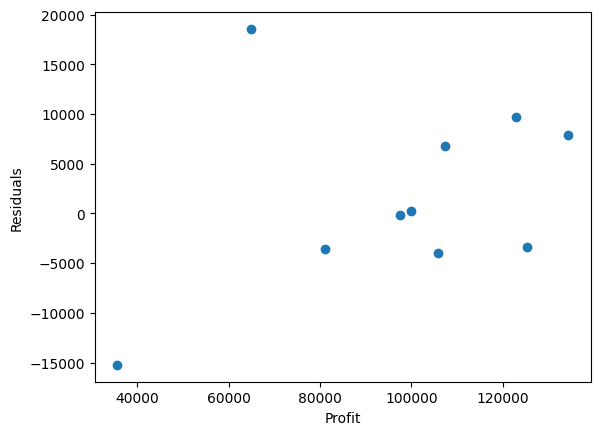

In [29]:
# Check for heteroscedasticity using residual plot
residuals = y_test - model_4.predict(X_test)
plt.scatter(y_test, residuals)
plt.xlabel('Profit')
plt.ylabel('Residuals')
plt.show()

<ipython-input-30-0deb458f8ae1>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)


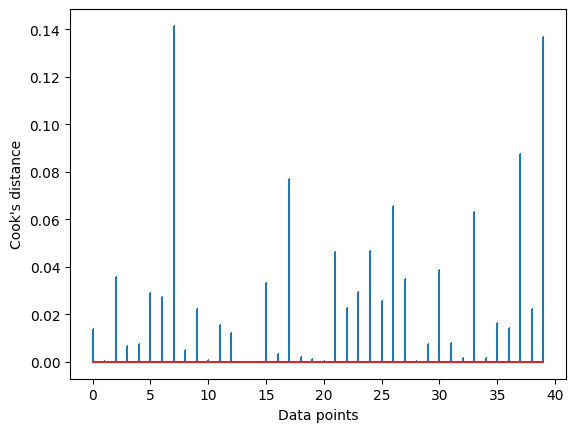

In [30]:
# Check for influential points using Cook's distance
influence = model_ols.get_influence()
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.xlabel('Data points')
plt.ylabel('Cook\'s distance')
plt.show()


<ipython-input-31-73f323faa0bf>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(leverage)), leverage, markerfmt=",", use_line_collection=True)


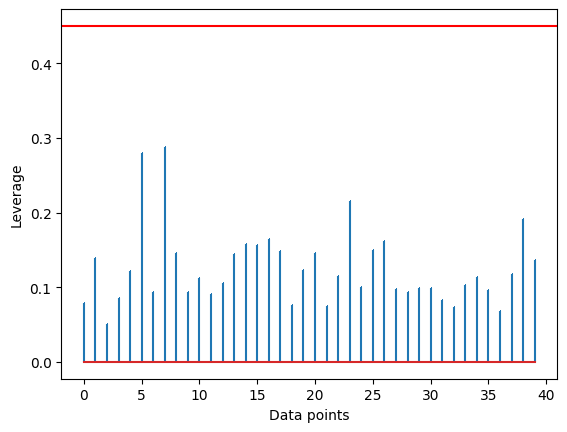

In [31]:
#Check for high leverage points using leverage cutoff value
leverage_cutoff = 3 * ((X_train.shape[1] + 1) / X_train.shape[0])
leverage = influence.hat_matrix_diag
plt.stem(np.arange(len(leverage)), leverage, markerfmt=",", use_line_collection=True)
plt.axhline(y=leverage_cutoff, color='r')
plt.xlabel('Data points')
plt.ylabel('Leverage')
plt.show()

# Build a final model by improving the existing model

In [32]:
# Remove the state variable with the highest p-value
X_train_new = X_train.drop(['State_Florida'], axis=1)
X_test_new = X_test.drop(['State_Florida'], axis=1)

final_model = LinearRegression().fit(X_train_new, y_train)

In [33]:
# Evaluate the final model using R-squared metric
final_r2 = r2_score(y_test, final_model.predict(X_test_new))
print(f"Final model R-squared value: {final_r2}")

Final model R-squared value: 0.8996381209727401
